## Imports & Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_txns = pd.read_csv("transactions-2022-01-12.csv", index_col=False)

In [3]:
raw_txns

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $3391.43/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method
0,0x67d8b0aa074e40fd82427782ccb4f86e3a26870d3490...,13987845,1641951433,2022-01-12 01:37:13,0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,0.0,0,0.00,0.015741,53.385779,NaN,NaN,NaN,Set Base URI
1,0xdbfe57b2a22d0cba42d83e70f7f9c7c57a89a7a0e5ab...,13988074,1641954646,2022-01-12 02:30:46,0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,0.0,0,0.00,0.009215,31.251416,NaN,NaN,NaN,Set Auction Sale Start Time
2,0xc208fdb2f133bda64522fececd6518a565aaa6e8801b...,13988541,1641961048,2022-01-12 04:17:28,0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,0.0,0,0.00,0.215971,732.451708,NaN,NaN,NaN,Dev Mint
3,0x8507440a1c90304858fd4aaad8e32316b760caf20b77...,13992072,1642008790,2022-01-12 17:33:10,0xed9bf3229ec29efaea2255d4aeae18c073a27922,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,0.0,0,0.00,0.011528,39.097764,NaN,NaN,NaN,Set Approval For All
4,0x1475e27e23448059a50c359de9480d5b957f4f1fabf4...,13992074,1642008807,2022-01-12 17:33:27,0x8370fadc4f023a16721ec261fa22b1a94f2c9d88,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,0.0,0,0.00,0.010693,36.266149,NaN,NaN,NaN,Set Approval For All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0x73e3eb4b7483f79a9eb197d3788cf88a3b0bce370774...,13992225,1642010697,2022-01-12 18:04:57,0x47c52c9a1b9749e70244806720955fe47a8be429,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,1.0,0,3391.43,0.009704,32.908979,NaN,Error(0),Reverted,Auction Mint
4996,0xa5222c8a4b27e8183f24234e0dfe5325f1c0d3415d36...,13992225,1642010697,2022-01-12 18:04:57,0x769768fcbd6630cb8202f76706a6ab1d12952087,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,2.0,0,6782.86,0.009704,32.908979,NaN,Error(0),Reverted,Auction Mint
4997,0xe7d18bcc3e5a24cc0edc5f40e20101dd7e578828ab11...,13992225,1642010697,2022-01-12 18:04:57,0x3baaac46cfa8de80daf02ae3970002125410a4b3,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,1.0,0,3391.43,0.009704,32.908979,NaN,Error(0),Reverted,Auction Mint
4998,0x90fda9d807290ab5f9e8f7c6e909b57f4ed95e8a8323...,13992225,1642010697,2022-01-12 18:04:57,0x4c7f4cb013ebad4dcbcff1357de57c7bb2ef8233,0xed5af388653567af2f388e6224dc7c4b3241c544,NaN,1.0,0,3391.43,0.009704,32.908979,NaN,Error(0),Reverted,Auction Mint


## Data Cleaning

In [4]:
# Drop cols I don't care about
clean_txns = raw_txns.drop(columns=["Blockno", "To", "ContractAddress", "CurrentValue @ $3391.43/Eth", 
                                    "TxnFee(USD)", "Historical $Price/Eth", "UnixTimestamp", "DateTime",
                                    "Value_OUT(ETH)"]) 

# Select only Auction Mint Transactions
clean_txns = clean_txns[clean_txns["Method"] == "Auction Mint"] 

# Select transactions that tried to mint at least 1 NFT
clean_txns = clean_txns[clean_txns["Value_IN(ETH)"] >= 1] 

## Failed Transactions

In [5]:
err_txns = clean_txns[clean_txns["ErrCode"] == "Reverted"]
print('Number of transactions that Reverted:', len(err_txns))
print('Total number of ETH that tried to Mint:', err_txns["Value_IN(ETH)"].sum())
print("Total Gas on failed transactions in ETH", err_txns["TxnFee(ETH)"].sum())

Number of transactions that Reverted: 1965
Total number of ETH that tried to Mint: 3703.0
Total Gas on failed transactions in ETH 22.982565510737544


## Successful Transactions

In [6]:
clean_txns = clean_txns[clean_txns["ErrCode"] != "Reverted"]
clean_txns = clean_txns.drop(columns=["Status", "ErrCode"])

In [13]:
print("Total successful transactions:", len(clean_txns))
print("Total ETH sent:", clean_txns["Value_IN(ETH)"].sum())
print("Number of unique addresses in mint:", clean_txns["From"].nunique())
print("Total Gas on successful transactions ETH:", clean_txns["TxnFee(ETH)"].sum())
print("Total Gas Fees:", clean_txns["TxnFee(ETH)"].sum() + err_txns["TxnFee(ETH)"].sum())
print("Average Gas Fee:", clean_txns["TxnFee(ETH)"].mean())

Total successful transactions: 2972
Total ETH sent: 8746.0
Number of unique addresses in mint: 2891
Total Gas on successful transactions ETH: 148.42119670070483
Total Gas Fees: 171.40376221144237
Average Gas Fee: 0.04993983738247184


In [8]:
clean_txns

,Txhash,From,Value_IN(ETH),TxnFee(ETH),Method
30,0xe3034e18aa6fa00ac39ffb6904baf9570cc31c1716c5...,0xdec08cb92a506b88411da9ba290f3694be223c26,5.0,0.054129,Auction Mint
31,0x9d2d85afaf4493229a9627b0fa6fe403fa2d55456606...,0x4693c4408967c800bd5008169027776b330fc3f2,5.0,0.679743,Auction Mint
32,0xa7576f0dd90fd750f34affa31c683eafe8a271c2e7b6...,0x365b94ab73ab228544a66e46b90be4deb946a6de,5.0,0.679655,Auction Mint
33,0xea26fbeccc851d54a0ec269da98dabbc254bd5db1769...,0x637c03de146b3abb21feb31c670a68ab9802be68,3.0,0.579005,Auction Mint
34,0xb76189c20445ac5fe3a1490ce6e6648e774b343d87b6...,0xf2303b698fd37175c7375c294ef78ef27842e34f,5.0,0.515007,Auction Mint
...,...,...,...,...,...
3000,0x61b851da76d898059c47dda4bade81deee80945fc94f...,0xbb8cc1841193cfa384fbb7dbc0435c9320b85c8b,1.0,0.039018,Auction Mint
3001,0x49e7dc0d3bfa2520f4c9f7f48f9cb88ddee82034eb77...,0x17853cbed35f3153dc144d709e01575cb75d326b,2.0,0.040188,Auction Mint
3003,0x231e873833c1b2b0c39eeec9efe0387acee364b77035...,0x1ccb2f538e97568e3c363d3191acae50ba8389b8,1.0,0.039018,Auction Mint
3004,0x68e66a3730a954a728a30166fda7e851a8caae534c7c...,0x0f4dc815bccd5da44e6ba06140c710813078510d,1.0,0.039018,Auction Mint


In [9]:
clean_txns["Value_IN(ETH)"].value_counts()

5.0    1145
1.0    1061
2.0     427
3.0     250
4.0      89
Name: Value_IN(ETH), dtype: int64

## Plots

### Box Plot

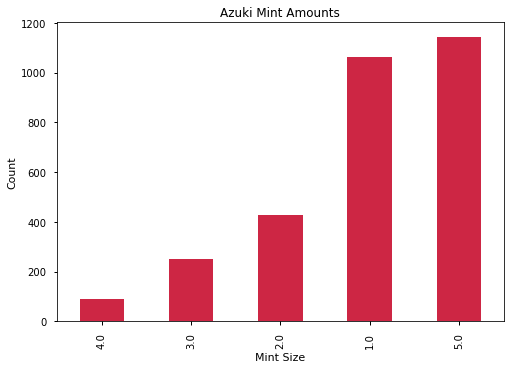

In [10]:
plt.style.use('seaborn-notebook')
plt.title("Azuki Mint Amounts")
plt.xlabel("Mint Size")
plt.ylabel("Count")
clean_txns["Value_IN(ETH)"].value_counts().sort_values().plot(kind = 'bar', color="#cd2644")
plt.show()

### Pie Chart

[35.7, 14.37, 8.41, 2.99, 38.53]


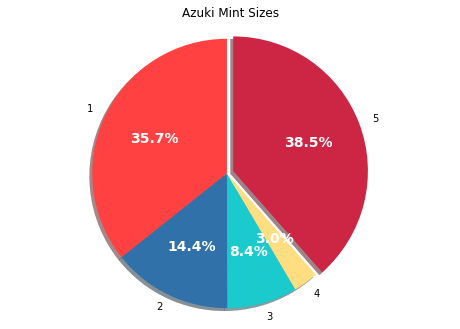

In [11]:
mint_sizes = [1.0, 2.0, 3.0, 4.0, 5.0]
mint_size_labels = [1, 2, 3, 4, 5]
percentages = []
explode = (0, 0, 0, 0, 0.05)

for size in mint_sizes:
    num_txns = clean_txns[clean_txns["Value_IN(ETH)"] == size]
    percentage = round(len(num_txns) / len(clean_txns) * 100, 2)
    percentages.append(percentage)
    
    
print(percentages)    
fig1, ax1 = plt.subplots()
pie_colors = ['#ff4141', '#3071a9', '#1bcacd', '#ffde82', '#cd2644']
wedges, texts, autotexts = ax1.pie(percentages, explode=explode, labels=mint_size_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=pie_colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Azuki Mint Sizes")
plt.setp(autotexts, size=14, weight="bold", color="w")

plt.show()